# Initiate this code

In [1]:
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import plotly as py
import numpy as np
from sklearn import preprocessing
import plotly.offline as pyo
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import requests  # For retrieving data online
import json      # for working with json files
from shapely.geometry import Point, Polygon

def get_df_by_year(df: pd.DataFrame, year: int) -> pd.DataFrame:
    idx = df['year'] == year
    return df[idx]

In [2]:
df87 = pd.read_csv('data/1987_va.csv', sep=',')
df92 = pd.read_csv('data/1992_va.csv', sep=',')
df97 = pd.read_csv('data/1997_va.csv', sep=',')
df02 = pd.read_csv('data/2002_va.csv', sep=',')
df07 = pd.read_csv('data/2007_va.csv', sep=',')
df12 = pd.read_csv('data/2012_va.csv', sep=',')
df17 = pd.read_csv('data/2017_va.csv', sep=',')
df22 = pd.read_csv('data/2022_va.csv', sep=',')
all_tri = pd.read_csv('data/all_tri.csv', sep=',')

/tmp/ipykernel_119/31732373.py:9: DtypeWarning:

Columns (21,22,23,28,29,118) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
df87['Combined Air'] = df87['48. 5.1 - FUGITIVE AIR'] + df87['49. 5.2 - STACK AIR']
df87['Non-Air'] = df87['104. TOTAL RELEASES'] - df87['Combined Air']
df87['Water'] = df87['50. 5.3 - WATER']
df87['Non-Water'] = df87['104. TOTAL RELEASES'] - df87['50. 5.3 - WATER']
df87['Other'] = df87['104. TOTAL RELEASES'] - (df87['50. 5.3 - WATER'] + df87['48. 5.1 - FUGITIVE AIR'] + df87['49. 5.2 - STACK AIR'])

In [28]:
df92['Combined Air'] = df92['48. 5.1 - FUGITIVE AIR'] + df92['49. 5.2 - STACK AIR']
df92['Non-Air'] = df92['104. TOTAL RELEASES'] - df92['Combined Air']
df92['Water'] = df92['50. 5.3 - WATER']
df92['Non-Water'] = df92['104. TOTAL RELEASES'] - df92['50. 5.3 - WATER']
df92['Other'] = df92['104. TOTAL RELEASES'] - (df92['50. 5.3 - WATER'] + df92['48. 5.1 - FUGITIVE AIR'] + df92['49. 5.2 - STACK AIR'])

In [5]:
df97['Combined Air'] = df97['48. 5.1 - FUGITIVE AIR'] + df97['49. 5.2 - STACK AIR']
df97['Non-Air'] = df97['104. TOTAL RELEASES'] - df97['Combined Air']
df97['Water'] = df97['50. 5.3 - WATER']
df97['Non-Water'] = df97['104. TOTAL RELEASES'] - df97['50. 5.3 - WATER']
df97['Other'] = df97['104. TOTAL RELEASES'] - (df97['50. 5.3 - WATER'] + df97['48. 5.1 - FUGITIVE AIR'] + df97['49. 5.2 - STACK AIR'])

In [6]:
df02['Combined Air'] = df02['48. 5.1 - FUGITIVE AIR'] + df02['49. 5.2 - STACK AIR']
df02['Non-Air'] = df02['104. TOTAL RELEASES'] - df02['Combined Air']
df02['Water'] = df02['50. 5.3 - WATER']
df02['Non-Water'] = df02['104. TOTAL RELEASES'] - df02['50. 5.3 - WATER']
df02['Other'] = df02['104. TOTAL RELEASES'] - (df02['50. 5.3 - WATER'] + df02['48. 5.1 - FUGITIVE AIR'] + df02['49. 5.2 - STACK AIR'])

In [7]:
df07['Combined Air'] = df07['48. 5.1 - FUGITIVE AIR'] + df07['49. 5.2 - STACK AIR']
df07['Non-Air'] = df07['104. TOTAL RELEASES'] - df07['Combined Air']
df07['Water'] = df07['50. 5.3 - WATER']
df07['Non-Water'] = df07['104. TOTAL RELEASES'] - df07['50. 5.3 - WATER']
df07['Other'] = df07['104. TOTAL RELEASES'] - (df07['50. 5.3 - WATER'] + df07['48. 5.1 - FUGITIVE AIR'] + df07['49. 5.2 - STACK AIR'])

In [8]:
df12['Combined Air'] = df12['48. 5.1 - FUGITIVE AIR'] + df12['49. 5.2 - STACK AIR']
df12['Non-Air'] = df12['104. TOTAL RELEASES'] - df12['Combined Air']
df12['Water'] = df12['50. 5.3 - WATER']
df12['Non-Water'] = df12['104. TOTAL RELEASES'] - df12['50. 5.3 - WATER']
df12['Other'] = df12['104. TOTAL RELEASES'] - (df12['50. 5.3 - WATER'] + df12['48. 5.1 - FUGITIVE AIR'] + df12['49. 5.2 - STACK AIR'])

In [9]:
df17['Combined Air'] = df17['48. 5.1 - FUGITIVE AIR'] + df17['49. 5.2 - STACK AIR']
df17['Non-Air'] = df17['104. TOTAL RELEASES'] - df17['Combined Air']
df17['Water'] = df17['50. 5.3 - WATER']
df17['Non-Water'] = df17['104. TOTAL RELEASES'] - df17['50. 5.3 - WATER']
df17['Other'] = df17['104. TOTAL RELEASES'] - (df17['50. 5.3 - WATER'] + df17['48. 5.1 - FUGITIVE AIR'] + df17['49. 5.2 - STACK AIR'])

In [10]:
df22['Combined Air'] = df22['48. 5.1 - FUGITIVE AIR'] + df22['49. 5.2 - STACK AIR']
df22['Non-Air'] = df22['104. TOTAL RELEASES'] - df22['Combined Air']
df22['Water'] = df22['50. 5.3 - WATER']
df22['Non-Water'] = df22['104. TOTAL RELEASES'] - df22['50. 5.3 - WATER']
df22['Other'] = df22['104. TOTAL RELEASES'] - (df22['50. 5.3 - WATER'] + df22['48. 5.1 - FUGITIVE AIR'] + df22['49. 5.2 - STACK AIR'])

### Carcinogen Graph

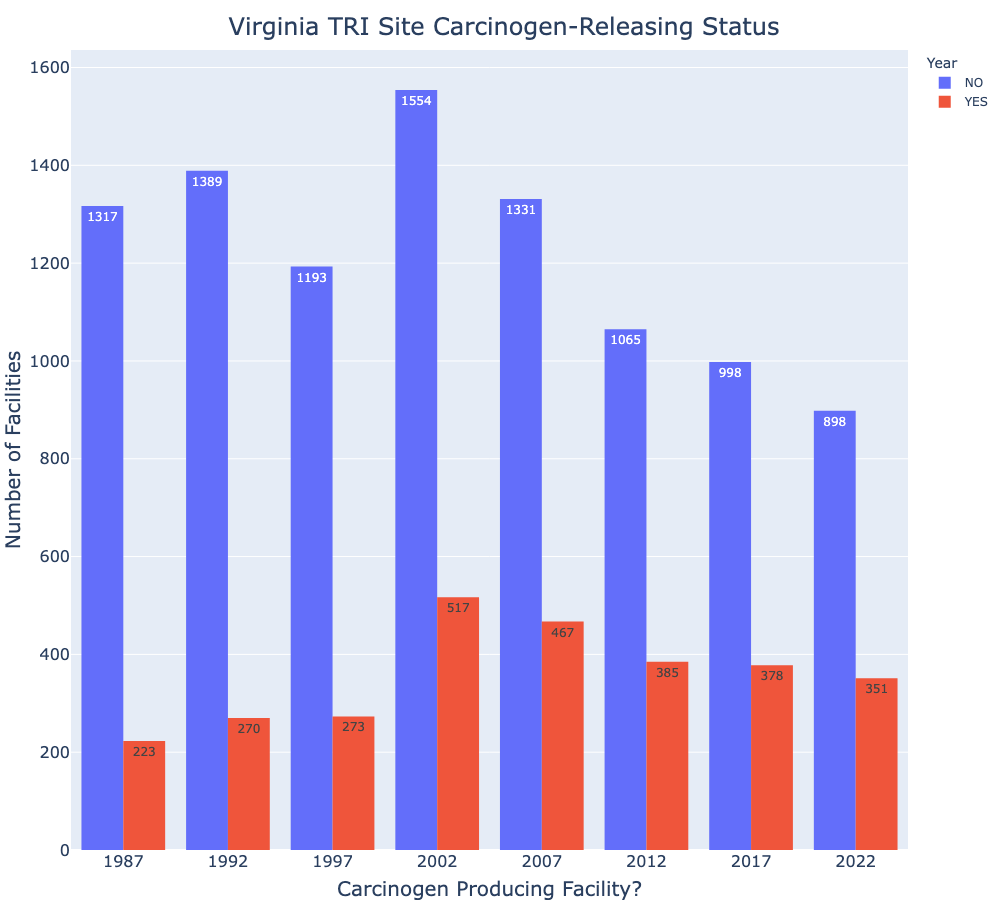

In [107]:
# ACTUALLY use this
y = '43. CARCINOGEN'
Xname = 'Carcinogen Producing Facility?'
Yname = 'Number of Facilities'
fig = px.histogram(all_tri, x="1. YEAR", color="43. CARCINOGEN", barmode="group", text_auto=True)
fig.update_layout(yaxis_title = Yname, xaxis_title = Xname)
fig.update_layout(autosize=False, width=1600, height=900)
fig.update_layout(title_text='Virginia TRI Site Carcinogen-Releasing Status', title_y=0.98, title_x=0.75)
fig.update_layout(margin=dict(t=50, b=0, l=0, r=100))
fig.update_layout(legend_title="Year", title_x=0.5)
fig.update_layout(yaxis = dict(tickfont = dict(size=16)))
fig.update_layout(xaxis = dict(tickfont = dict(size=16)))
fig.update_layout(
    title_font=dict(size=24),
    xaxis_title_font=dict(size=20),
    yaxis_title_font=dict(size=20)  
)
# fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

# increase label size

### 1987 Top Sectors by Releases Compared to 2022 Same Sectors (USE)

In [ ]:
# URGENT: Instead of total releases, look at air vs non-air
# add the two air columns together, make stacked grouped histogram

In [94]:
# sum_releases87 = df87.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
sum_releases87 = df87.groupby('20. INDUSTRY SECTOR').agg({'104. TOTAL RELEASES': 'sum', 
                                                          'Combined Air': 'sum',
                                                          '50. 5.3 - WATER': 'sum',
                                                         }).reset_index()
releases87 = sum_releases87.sort_values("104. TOTAL RELEASES", ascending=False)
top10_releases87 = sum_releases87.sort_values("104. TOTAL RELEASES", ascending=False).head(10)
top10_releases87['Year'] = '1987'
top10_releases87 = top10_releases87.rename(columns={'20. INDUSTRY SECTOR': 'Sector', '104. TOTAL RELEASES': 'Total Releases', '50. 5.3 - WATER' : 'Water'})
top10_releases87

Sector  Total Releases  Combined Air  \
3                           Chemicals     209006742.0    75234885.0   
14                              Paper     123572811.0    18752489.0   
8                           Furniture       9593993.0     9321768.0   
19                           Printing       7627668.0     7624318.0   
17                Plastics and Rubber       6725559.0     6333701.0   
21                           Textiles       6458216.0     3994270.0   
18                     Primary Metals       5192312.0     2680080.0   
23           Transportation Equipment       5010296.0     2911236.0   
4   Computers and Electronic Products       4967561.0     4454919.0   
13                              Other       4796247.0     4793747.0   

          Water  Year  
3   123215261.0  1987  
14   99941364.0  1987  
8           0.0  1987  
19        250.0  1987  
17        503.0  1987  
21    2037283.0  1987  
18      32996.0  1987  
23      97136.0  1987  
4         190.0  1987  
13       2500.0  1987

### 2022 Sectors based on 1987 (USE)

In [95]:
# sum_releases22 = df22.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
sum_releases22 = df22.groupby('20. INDUSTRY SECTOR').agg({'104. TOTAL RELEASES': 'sum', 
                                                          'Combined Air': 'sum',
                                                          '50. 5.3 - WATER': 'sum',
                                                         }).reset_index()
top10_releases22 = sum_releases22.sort_values("104. TOTAL RELEASES", ascending=False)
top10_releases22['Year'] = '2022'
top10_releases22.head(10)

20. INDUSTRY SECTOR  104. TOTAL RELEASES  Combined Air  \
13                     Other         8.624468e+06  9.875721e+04   
14                     Paper         6.534435e+06  5.046022e+06   
2                  Chemicals         4.783454e+06  2.710608e+06   
4         Electric Utilities         1.790412e+06  1.263527e+06   
7                       Food         1.775758e+06  5.971080e+05   
6          Fabricated Metals         1.608258e+06  7.180697e+05   
18            Primary Metals         1.338907e+06  1.806303e+05   
15                 Petroleum         1.318013e+06  1.317967e+06   
17       Plastics and Rubber         1.117182e+06  9.560208e+05   
23  Transportation Equipment         4.292275e+05  2.065159e+05   

    50. 5.3 - WATER  Year  
13     8.131779e+06  2022  
14     2.266375e+05  2022  
2      3.684343e+05  2022  
4      3.006500e+03  2022  
7      7.945833e+05  2022  
6      5.878526e+05  2022  
18     2.049494e+03  2022  
15     0.000000e+00  2022  
17     9.400000e+01  2022  
23     4.240810e+03  2022

In [96]:
match_releases22 = []
i=0
for i in range(10):
    sector_name = top10_releases87["Sector"].iloc[i]
    sect22 = top10_releases22.loc[top10_releases22['20. INDUSTRY SECTOR'] == sector_name]
    match_releases22.append([sector_name, 
                             sect22['104. TOTAL RELEASES'].loc[sect22.index[0]], 
                             sect22['Combined Air'].loc[sect22.index[0]],
                             sect22['50. 5.3 - WATER'].loc[sect22.index[0]],
                             '2022'
                            ])
match22_releasesdf = pd.DataFrame(match_releases22, columns=['Sector', 'Total Releases', 'Combined Air', 'Water', 'Year'])
match22_releasesdf

Sector  Total Releases  Combined Air  \
0                          Chemicals    4.783454e+06  2.710608e+06   
1                              Paper    6.534435e+06  5.046022e+06   
2                          Furniture    1.516438e+05  1.516438e+05   
3                           Printing    2.151657e+04  1.658500e+04   
4                Plastics and Rubber    1.117182e+06  9.560208e+05   
5                           Textiles    1.375435e+04  2.042522e+02   
6                     Primary Metals    1.338907e+06  1.806303e+05   
7           Transportation Equipment    4.292275e+05  2.065159e+05   
8  Computers and Electronic Products    6.538995e+04  5.975298e+04   
9                              Other    8.624468e+06  9.875721e+04   

          Water  Year  
0  3.684343e+05  2022  
1  2.266375e+05  2022  
2  0.000000e+00  2022  
3  0.000000e+00  2022  
4  9.400000e+01  2022  
5  0.000000e+00  2022  
6  2.049494e+03  2022  
7  4.240810e+03  2022  
8  8.600000e+01  2022  
9  8.131779e+06  2022

In [97]:
frames = [top10_releases87, match22_releasesdf]
releases_df = pd.concat(frames)
releases_df

Sector  Total Releases  Combined Air  \
3                           Chemicals    2.090067e+08  7.523488e+07   
14                              Paper    1.235728e+08  1.875249e+07   
8                           Furniture    9.593993e+06  9.321768e+06   
19                           Printing    7.627668e+06  7.624318e+06   
17                Plastics and Rubber    6.725559e+06  6.333701e+06   
21                           Textiles    6.458216e+06  3.994270e+06   
18                     Primary Metals    5.192312e+06  2.680080e+06   
23           Transportation Equipment    5.010296e+06  2.911236e+06   
4   Computers and Electronic Products    4.967561e+06  4.454919e+06   
13                              Other    4.796247e+06  4.793747e+06   
0                           Chemicals    4.783454e+06  2.710608e+06   
1                               Paper    6.534435e+06  5.046022e+06   
2                           Furniture    1.516438e+05  1.516438e+05   
3                            Printing    2.151657e+04  1.658500e+04   
4                 Plastics and Rubber    1.117182e+06  9.560208e+05   
5                            Textiles    1.375435e+04  2.042522e+02   
6                      Primary Metals    1.338907e+06  1.806303e+05   
7            Transportation Equipment    4.292275e+05  2.065159e+05   
8   Computers and Electronic Products    6.538995e+04  5.975298e+04   
9                               Other    8.624468e+06  9.875721e+04   

           Water  Year  
3   1.232153e+08  1987  
14  9.994136e+07  1987  
8   0.000000e+00  1987  
19  2.500000e+02  1987  
17  5.030000e+02  1987  
21  2.037283e+06  1987  
18  3.299600e+04  1987  
23  9.713600e+04  1987  
4   1.900000e+02  1987  
13  2.500000e+03  1987  
0   3.684343e+05  2022  
1   2.266375e+05  2022  
2   0.000000e+00  2022  
3   0.000000e+00  2022  
4   9.400000e+01  2022  
5   0.000000e+00  2022  
6   2.049494e+03  2022  
7   4.240810e+03  2022  
8   8.600000e+01  2022  
9   8.131779e+06  2022

In [50]:
# releases_df['Logarithmized Data'] = np.log10(releases_df['104. TOTAL RELEASES'])
# releases_df

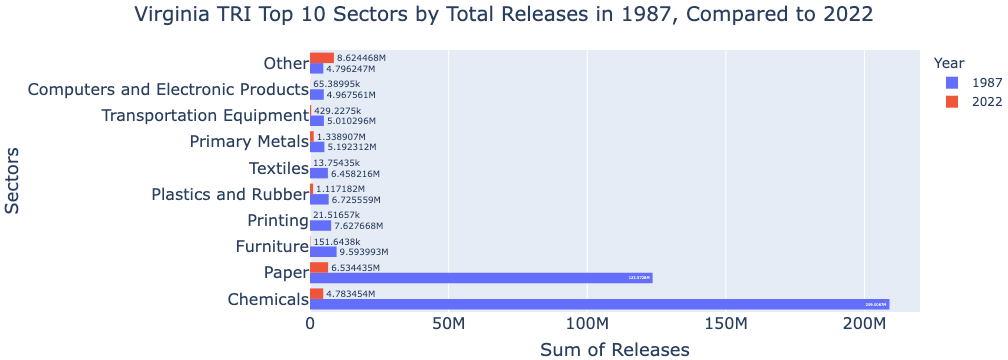

In [89]:
releases_df.sort_values(['Year'],ascending=[True],inplace=True)
fig = px.histogram(releases_df, y="Sector", x="Total Releases", color="Year", barmode="group", text_auto=True)
fig.update_layout(yaxis_title = "Sectors", xaxis_title = "Sum of Releases")
# fig.update_layout(autosize=False, width=1000, height=700)
# fig.update_layout(autosize=False, width=1600, height=900)
fig.update_layout(autosize=True)
fig.update_layout(title_text='Virginia TRI Top 10 Sectors by Total Releases in 1987, Compared to 2022', 
                  title_y=0.98, title_x=0.85)
fig.update_layout(margin=dict(t=50, b=0, l=0, r=50))
fig.update_layout(legend_title="Year", title_x=0.5)
fig.update_layout(height=950)
fig.update_layout(
    title_font=dict(size=20),
    xaxis_title_font=dict(size=18),
    yaxis_title_font=dict(size=18),
    yaxis = dict(tickfont = dict(size=16)),
    xaxis = dict(tickfont = dict(size=16))
)
traceorder = "normal"
fig.show()

In [99]:
df_melted = pd.melt(releases_df, id_vars=['Sector', 'Year'], var_name='Type of Release', value_name='Value')
df_melted

Sector  Year Type of Release         Value
0                           Chemicals  1987  Total Releases  2.090067e+08
1                               Paper  1987  Total Releases  1.235728e+08
2                           Furniture  1987  Total Releases  9.593993e+06
3                            Printing  1987  Total Releases  7.627668e+06
4                 Plastics and Rubber  1987  Total Releases  6.725559e+06
5                            Textiles  1987  Total Releases  6.458216e+06
6                      Primary Metals  1987  Total Releases  5.192312e+06
7            Transportation Equipment  1987  Total Releases  5.010296e+06
8   Computers and Electronic Products  1987  Total Releases  4.967561e+06
9                               Other  1987  Total Releases  4.796247e+06
10                          Chemicals  2022  Total Releases  4.783454e+06
11                              Paper  2022  Total Releases  6.534435e+06
12                          Furniture  2022  Total Releases  1.516438e+05
13                           Printing  2022  Total Releases  2.151657e+04
14                Plastics and Rubber  2022  Total Releases  1.117182e+06
15                           Textiles  2022  Total Releases  1.375435e+04
16                     Primary Metals  2022  Total Releases  1.338907e+06
17           Transportation Equipment  2022  Total Releases  4.292275e+05
18  Computers and Electronic Products  2022  Total Releases  6.538995e+04
19                              Other  2022  Total Releases  8.624468e+06
20                          Chemicals  1987    Combined Air  7.523488e+07
21                              Paper  1987    Combined Air  1.875249e+07
22                          Furniture  1987    Combined Air  9.321768e+06
23                           Printing  1987    Combined Air  7.624318e+06
24                Plastics and Rubber  1987    Combined Air  6.333701e+06
25                           Textiles  1987    Combined Air  3.994270e+06
26                     Primary Metals  1987    Combined Air  2.680080e+06
27           Transportation Equipment  1987    Combined Air  2.911236e+06
28  Computers and Electronic Products  1987    Combined Air  4.454919e+06
29                              Other  1987    Combined Air  4.793747e+06
30                          Chemicals  2022    Combined Air  2.710608e+06
31                              Paper  2022    Combined Air  5.046022e+06
32                          Furniture  2022    Combined Air  1.516438e+05
33                           Printing  2022    Combined Air  1.658500e+04
34                Plastics and Rubber  2022    Combined Air  9.560208e+05
35                           Textiles  2022    Combined Air  2.042522e+02
36                     Primary Metals  2022    Combined Air  1.806303e+05
37           Transportation Equipment  2022    Combined Air  2.065159e+05
38  Computers and Electronic Products  2022    Combined Air  5.975298e+04
39                              Other  2022    Combined Air  9.875721e+04
40                          Chemicals  1987           Water  1.232153e+08
41                              Paper  1987           Water  9.994136e+07
42                          Furniture  1987           Water  0.000000e+00
43                           Printing  1987           Water  2.500000e+02
44                Plastics and Rubber  1987           Water  5.030000e+02
45                           Textiles  1987           Water  2.037283e+06
46                     Primary Metals  1987           Water  3.299600e+04
47           Transportation Equipment  1987           Water  9.713600e+04
48  Computers and Electronic Products  1987           Water  1.900000e+02
49                              Other  1987           Water  2.500000e+03
50                          Chemicals  2022           Water  3.684343e+05
51                              Paper  2022           Water  2.266375e+05
52                          Furniture  2022           Water  0.000000e+00
53                           Printi

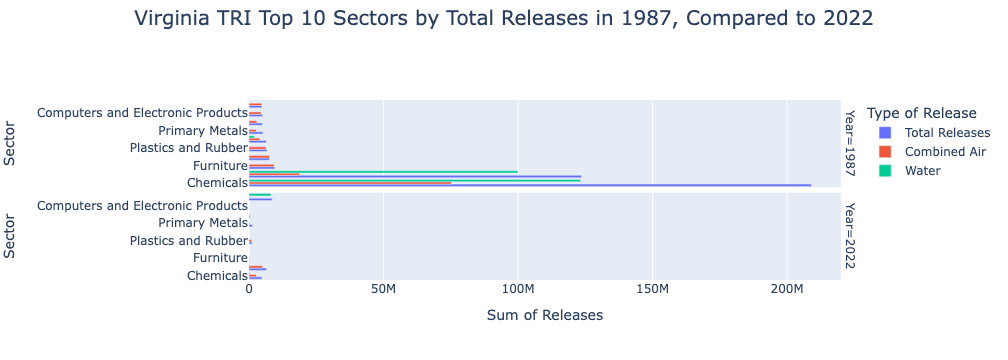

In [106]:
fig = px.bar(df_melted, 
             x='Value', 
             y='Sector', 
             color='Type of Release', 
             barmode='group', 
             orientation='h', 
             facet_row='Year', 
             height=2000,
             title='Virginia TRI Top 10 Sectors by Total Releases in 1987, Compared to 2022')
fig.update_layout(xaxis_title = "Sum of Releases")
fig.update_layout(title_y=0.97, title_x=0.5)
fig.update_layout(
    title_font=dict(size=20)
)
fig.show()

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log



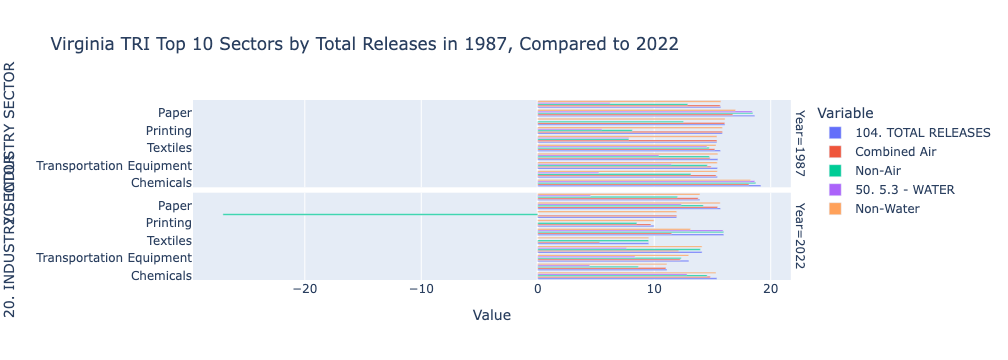

In [15]:
# With logarithmized data
df_melted['Value'] = np.log(df_melted['Value'])
fig = px.bar(df_melted, 
             x='Value', 
             y='20. INDUSTRY SECTOR', 
             color='Variable', 
             barmode='group', 
             orientation='h', 
             facet_row='Year', 
             height=1000,
             title='Virginia TRI Top 10 Sectors by Total Releases in 1987, Compared to 2022')

fig.show()

### Geovisualization

In [ ]:
color_code = []
for i in range(len(df87)):
    release = df87['104. TOTAL RELEASES'].iloc[i]
    if release < 20000: #dummy numbers
        color_code += ['green'] #fee0d2
    elif 20000 < release < 80000:
        color_code += ['red'] #fc9272
    else:
        color_code += ['blue'] #de2d26
color_code
df87_color = pd.DataFrame({'Color':color_code})
# df87_color
df87['Color'] = df87_color['Color'].values
# df87
# change the if else color_code to buckets with the range values

In [29]:
color_code3 = []
for i in range(len(df92)):
    release = df92['104. TOTAL RELEASES'].iloc[i]
    if release < 20000: #dummy numbers
        color_code3 += ['green'] #fee0d2
    elif 20000 < release < 80000:
        color_code3 += ['red'] #fc9272
    else:
        color_code3 += ['blue'] #de2d26
color_code
df92_color = pd.DataFrame({'Color':color_code3})
# df87_color
df92['Color'] = df92_color['Color'].values

In [30]:
color_code4 = []
for i in range(len(df97)):
    release = df97['104. TOTAL RELEASES'].iloc[i]
    if release < 20000: #dummy numbers
        color_code4 += ['green'] #fee0d2
    elif 20000 < release < 80000:
        color_code4 += ['red'] #fc9272
    else:
        color_code4 += ['blue'] #de2d26
color_code4
df97_color = pd.DataFrame({'Color':color_code4})
# df87_color
df97['Color'] = df97_color['Color'].values

In [31]:
color_code5 = []
for i in range(len(df02)):
    release = df02['104. TOTAL RELEASES'].iloc[i]
    if release < 20000: #dummy numbers
        color_code5 += ['green'] #fee0d2
    elif 20000 < release < 80000:
        color_code5 += ['red'] #fc9272
    else:
        color_code5 += ['blue'] #de2d26
color_code5
df02_color = pd.DataFrame({'Color':color_code5})
# df87_color
df02['Color'] = df02_color['Color'].values

In [33]:
color_code6 = []
for i in range(len(df07)):
    release = df07['104. TOTAL RELEASES'].iloc[i]
    if release < 20000: #dummy numbers
        color_code6 += ['green'] #fee0d2
    elif 20000 < release < 80000:
        color_code6 += ['red'] #fc9272
    else:
        color_code6 += ['blue'] #de2d26
color_code6
df07_color = pd.DataFrame({'Color':color_code6})
# df87_color
df07['Color'] = df07_color['Color'].values

In [34]:
color_code7 = []
for i in range(len(df12)):
    release = df12['104. TOTAL RELEASES'].iloc[i]
    if release < 20000: #dummy numbers
        color_code7 += ['green'] #fee0d2
    elif 20000 < release < 80000:
        color_code7 += ['red'] #fc9272
    else:
        color_code7 += ['blue'] #de2d26
color_code7
df12_color = pd.DataFrame({'Color':color_code7})
# df87_color
df12['Color'] = df12_color['Color'].values

In [35]:
color_code8 = []
for i in range(len(df17)):
    release = df17['104. TOTAL RELEASES'].iloc[i]
    if release < 20000: #dummy numbers
        color_code8 += ['green'] #fee0d2
    elif 20000 < release < 80000:
        color_code8 += ['red'] #fc9272
    else:
        color_code8 += ['blue'] #de2d26
color_code8
df17_color = pd.DataFrame({'Color':color_code8})
# df87_color
df17['Color'] = df17_color['Color'].values

In [ ]:
color_code2 = []
for i in range(len(df22)):
    release = df22['104. TOTAL RELEASES'].iloc[i]
    if release < 20000: #dummy numbers
        color_code2 += ['green'] #fee0d2
    elif 20000 < release < 80000:
        color_code2 += ['red'] #fc9272
    else:
        color_code2 += ['blue'] #de2d26
color_code2
df22_color = pd.DataFrame({'Color':color_code2})
df22['Color'] = df22_color['Color'].values
# df22

In [14]:
# https://github.com/glynnbird/usstatesgeojson/blob/master/virginia.geojson
url = 'data/virginia.geojson'
va = gpd.read_file(url)
va

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


name abbreviation   capital            city  population    area  \
0  Virginia           VA  Richmond  Virginia Beach     8260405  110787   

   waterarea  landarea  houseseats   statehood      group  \
0       8508    102279          11  1788-06-25  US States   

                                            geometry  
0  MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ...

In [42]:
geometry87=[Point(xy) for xy in zip(df87["13. LONGITUDE"], df87["12. LATITUDE"])]
geodata87=gpd.GeoDataFrame(df87,geometry=geometry87)

geometry92=[Point(xy) for xy in zip(df92["13. LONGITUDE"], df92["12. LATITUDE"])]
geodata92=gpd.GeoDataFrame(df92,geometry=geometry92)

geometry97=[Point(xy) for xy in zip(df97["13. LONGITUDE"], df97["12. LATITUDE"])]
geodata97=gpd.GeoDataFrame(df97,geometry=geometry97)

geometry02=[Point(xy) for xy in zip(df02["13. LONGITUDE"], df02["12. LATITUDE"])]
geodata02=gpd.GeoDataFrame(df02,geometry=geometry02)

geometry07=[Point(xy) for xy in zip(df07["13. LONGITUDE"], df07["12. LATITUDE"])]
geodata07=gpd.GeoDataFrame(df07,geometry=geometry07)

geometry12=[Point(xy) for xy in zip(df12["13. LONGITUDE"], df12["12. LATITUDE"])]
geodata12=gpd.GeoDataFrame(df12,geometry=geometry12)

geometry12=[Point(xy) for xy in zip(df12["13. LONGITUDE"], df12["12. LATITUDE"])]
geodata12=gpd.GeoDataFrame(df12,geometry=geometry12)

geometry17=[Point(xy) for xy in zip(df17["13. LONGITUDE"], df17["12. LATITUDE"])]
geodata17=gpd.GeoDataFrame(df17,geometry=geometry17)

geometry22=[Point(xy) for xy in zip(df22["13. LONGITUDE"], df22["12. LATITUDE"])]
geodata22=gpd.GeoDataFrame(df22,geometry=geometry22)

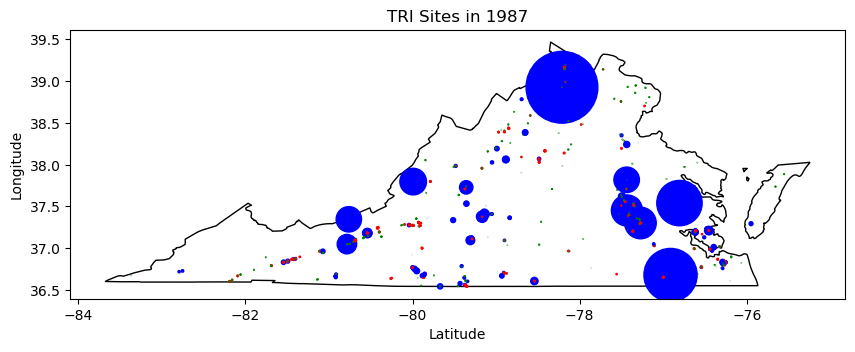

In [22]:
fig, ax = plt.subplots(figsize=[10,7])
# va.plot(ax=ax, color='white', edgecolor='black', figsize=(10,6))
va.plot(ax=ax, color='white', edgecolor='black')
geodata87.plot(ax=ax, marker='o', color=df87['Color'], markersize=df87['104. TOTAL RELEASES']/30000)
plt.title("TRI Sites in 1987")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()
# add color column to dataframe, assign total release ranges to different colors

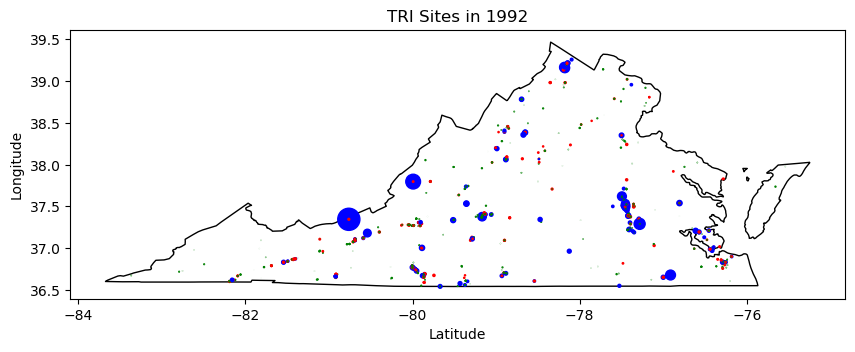

In [46]:
fig, ax = plt.subplots(figsize=[10,7])
# va.plot(ax=ax, color='white', edgecolor='black', figsize=(10,6))
va.plot(ax=ax, color='white', edgecolor='black')
geodata92.plot(ax=ax, marker='o', color=df92['Color'], markersize=df92['104. TOTAL RELEASES']/30000)
plt.title("TRI Sites in 1992")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

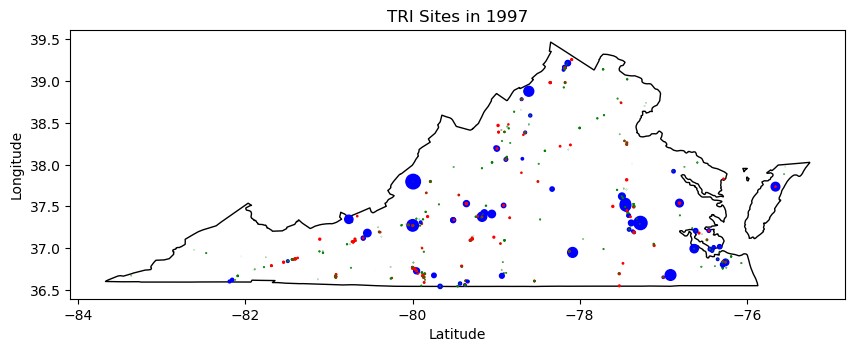

In [47]:
fig, ax = plt.subplots(figsize=[10,7])
# va.plot(ax=ax, color='white', edgecolor='black', figsize=(10,6))
va.plot(ax=ax, color='white', edgecolor='black')
geodata97.plot(ax=ax, marker='o', color=df97['Color'], markersize=df97['104. TOTAL RELEASES']/30000)
plt.title("TRI Sites in 1997")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

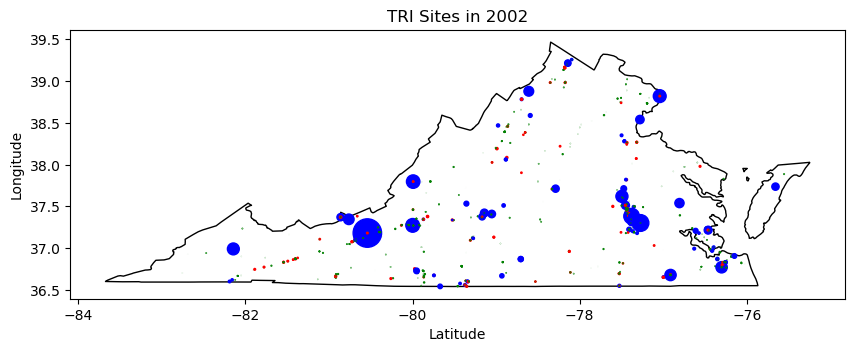

In [48]:
fig, ax = plt.subplots(figsize=[10,7])
# va.plot(ax=ax, color='white', edgecolor='black', figsize=(10,6))
va.plot(ax=ax, color='white', edgecolor='black')
geodata02.plot(ax=ax, marker='o', color=df02['Color'], markersize=df02['104. TOTAL RELEASES']/30000)
plt.title("TRI Sites in 2002")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

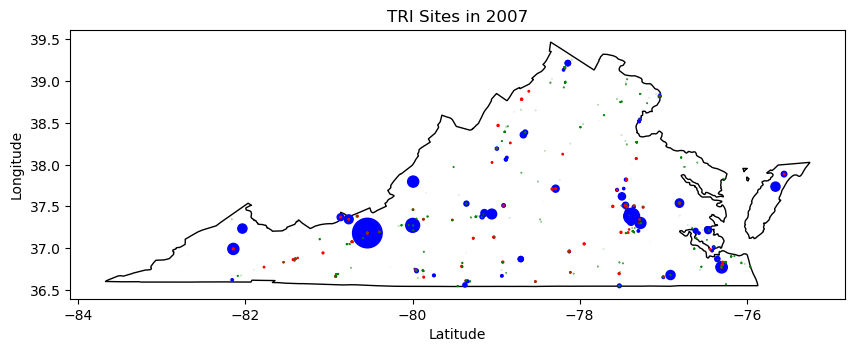

In [49]:
fig, ax = plt.subplots(figsize=[10,7])
# va.plot(ax=ax, color='white', edgecolor='black', figsize=(10,6))
va.plot(ax=ax, color='white', edgecolor='black')
geodata07.plot(ax=ax, marker='o', color=df07['Color'], markersize=df07['104. TOTAL RELEASES']/30000)
plt.title("TRI Sites in 2007")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

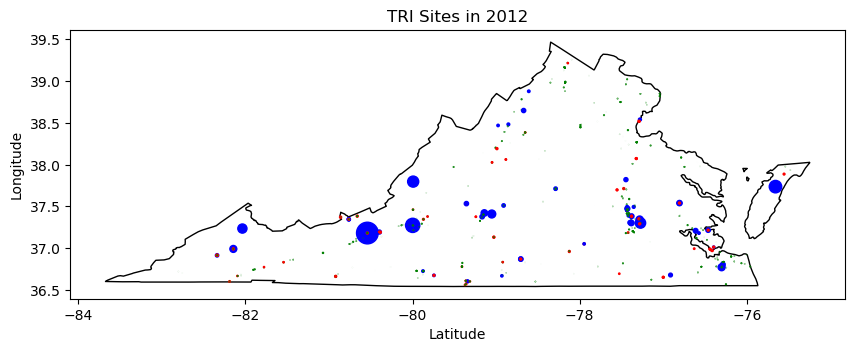

In [50]:
fig, ax = plt.subplots(figsize=[10,7])
# va.plot(ax=ax, color='white', edgecolor='black', figsize=(10,6))
va.plot(ax=ax, color='white', edgecolor='black')
geodata12.plot(ax=ax, marker='o', color=df12['Color'], markersize=df12['104. TOTAL RELEASES']/30000)
plt.title("TRI Sites in 2012")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

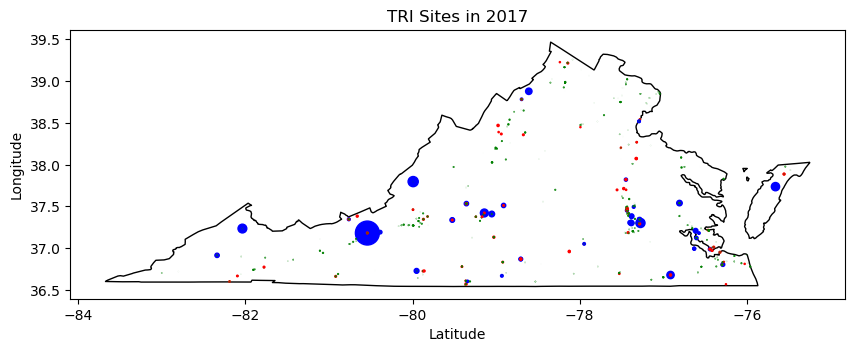

In [58]:
fig, ax = plt.subplots(figsize=[10,7])
# va.plot(ax=ax, color='white', edgecolor='black', figsize=(10,6))
va.plot(ax=ax, color='white', edgecolor='black')
geodata17.plot(ax=ax, marker='o', color=df17['Color'], markersize=df17['104. TOTAL RELEASES']/30000)
plt.title("TRI Sites in 2017")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

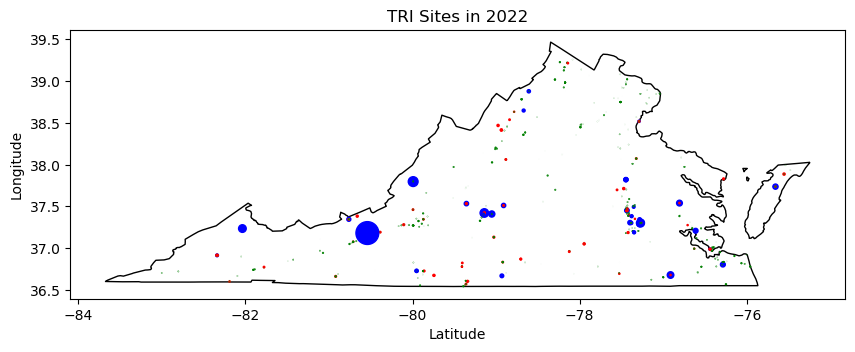

In [27]:
fig, ax = plt.subplots(figsize=[10,7]) #inches
va.plot(ax=ax, color='white', edgecolor='black')
geodata22.plot(ax=ax, marker='o', color=df22['Color'], markersize=df22['104. TOTAL RELEASES']/30000)
plt.title("TRI Sites in 2022")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [16]:
# look at more explanatory data/graphs for time series
# time series line plot


# writeup: look at why some categories in 2022 have gone down
# look at data for one or two sectors?
# time series for other years

In [88]:
fig = px.choropleth(data_frame=geodata87,
                    locations='geodata87',
                    color='lifeExp',
                    hover_data={'iso_alpha': False},
                    range_color=[df['lifeExp'].min(), df['lifeExp'].max()],
                    labels = {'year': 'Year', 'lifeExp': 'Life Exp.'}
                   )

NameError: name 'df' is not defined

### Individual Line Graph for Just Paper and Food Sectors
- Emissions on Y axis
- Year on X axis
- Graph should be a line graph, lines should be the sectors
- Focus on Industry Sector Paper and Food filters, and add their total releases over the years

In [23]:
filter87 = df87[['20. INDUSTRY SECTOR', '104. TOTAL RELEASES']]
filter87

20. INDUSTRY SECTOR  104. TOTAL RELEASES
0           Wood Products                750.0
1               Furniture              15350.0
2               Chemicals                500.0
3               Furniture              35913.0
4     Plastics and Rubber              48456.0
...                   ...                  ...
1535            Furniture              99593.0
1536       Primary Metals             108000.0
1537       Primary Metals                250.0
1538                Paper             530200.0
1539            Chemicals                  0.0

[1540 rows x 2 columns]

### Food

#### 1987

In [24]:
food87 = filter87.loc[filter87['20. INDUSTRY SECTOR'] == 'Food']
food87

20. INDUSTRY SECTOR  104. TOTAL RELEASES
38                  Food                  0.0
41                  Food              19913.0
65                  Food                  0.0
69                  Food                  0.0
79                  Food               7080.0
110                 Food                  0.0
116                 Food                  0.0
118                 Food               6720.0
169                 Food               2500.0
227                 Food                  0.0
228                 Food                  0.0
292                 Food                  0.0
312                 Food                  0.0
317                 Food              12000.0
329                 Food                  0.0
343                 Food                  0.0
507                 Food               2990.0
596                 Food              30690.0
623                 Food                  0.0
645                 Food                  0.0
666                 Food                  0.0
680                 Food                  0.0
687                 Food                  0.0
753                 Food                  0.0
783                 Food                  0.0
804                 Food                  0.0
834                 Food                  0.0
892                 Food             242000.0
900                 Food                  0.0
902                 Food                  0.0
949                 Food               5254.0
973                 Food                  0.0
989                 Food              40000.0
1064                Food                  0.0
1120                Food               1620.0
1128                Food                  0.0
1138                Food                  0.0
1156                Food              40000.0
1161                Food              11158.0
1164                Food                  0.0
1181                Food              31700.0
1254                Food                250.0
1295                Food                  0.0
1299                Food               8398.0
1301                Food                  0.0
1333                Food                  0.0
1336                Food                  0.0
1341                Food                  0.0
1359                Food              11500.0
1360                Food                  0.0
1431                Food               7800.0
1434                Food                  0.0
1465                Food                  0.0
1473                Food                  0.0
1512                Food                  0.0
1514                Food               1600.0
1533                Food               2300.0

In [25]:
sum_food87 = food87['104. TOTAL RELEASES'].to_numpy().sum()
sum_food87

# *** do the same process for other years and append them into their own dataframe

# data = [['Sector', 'Food'], ['Sum of Releases', sum_food87]]

# Create the pandas DataFrame
# df = pd.DataFrame(data, columns=['Sector', 'Sum of Releases'])
# print(df)

485473.0

#### 1992

In [61]:
filter92 = df92[['20. INDUSTRY SECTOR', '104. TOTAL RELEASES']]
food92 = filter92.loc[filter92['20. INDUSTRY SECTOR'] == 'Food']
sum_food92 = food92['104. TOTAL RELEASES'].to_numpy().sum()
sum_food92

410716.0

#### 1997

In [60]:
filter97 = df97[['20. INDUSTRY SECTOR', '104. TOTAL RELEASES']]
food97 = filter97.loc[filter97['20. INDUSTRY SECTOR'] == 'Food']
sum_food97 = food97['104. TOTAL RELEASES'].to_numpy().sum()
sum_food97

4655781.0

#### 2002

In [62]:
filter02 = df02[['20. INDUSTRY SECTOR', '104. TOTAL RELEASES']]
food02 = filter02.loc[filter02['20. INDUSTRY SECTOR'] == 'Food']
sum_food02 = food02['104. TOTAL RELEASES'].to_numpy().sum()
sum_food02

3452165.58

#### 2007

In [63]:
filter07 = df07[['20. INDUSTRY SECTOR', '104. TOTAL RELEASES']]
food07 = filter07.loc[filter02['20. INDUSTRY SECTOR'] == 'Food']
sum_food07 = food07['104. TOTAL RELEASES'].to_numpy().sum()
sum_food07

928578.8992999999

#### 2012

In [64]:
filter12 = df12[['20. INDUSTRY SECTOR', '104. TOTAL RELEASES']]
food12 = filter12.loc[filter12['20. INDUSTRY SECTOR'] == 'Food']
sum_food12 = food12['104. TOTAL RELEASES'].to_numpy().sum()
sum_food12

3370903.5700000003

#### 2017

In [65]:
filter17 = df17[['20. INDUSTRY SECTOR', '104. TOTAL RELEASES']]
food17 = filter17.loc[filter17['20. INDUSTRY SECTOR'] == 'Food']
sum_food17 = food17['104. TOTAL RELEASES'].to_numpy().sum()
sum_food17

2944558.0700000003

#### 2022

In [56]:
filter22 = df22[['20. INDUSTRY SECTOR', '104. TOTAL RELEASES']]
food22 = filter22.loc[filter22['20. INDUSTRY SECTOR'] == 'Food']
sum_food22 = food22['104. TOTAL RELEASES'].to_numpy().sum()
sum_food22

1775758.3460000004

#### Summing all food sums together

In [66]:
sum_food_df = pd.DataFrame()
sum_food_df['Sum of Releases'] = [sum_food87, 
                                  sum_food92,
                                  sum_food97,
                                  sum_food02,
                                  sum_food07,
                                  sum_food12,
                                  sum_food17,
                                  sum_food22]
sum_food_df.insert(1, "Year", [1987, 1992, 1997, 2002, 
                               2007, 2012, 2017, 2022], True)
sum_food_df["Sector"] = 'Food'
sum_food_df

Sum of Releases  Year Sector
0     4.854730e+05  1987   Food
1     4.107160e+05  1992   Food
2     4.655781e+06  1997   Food
3     3.452166e+06  2002   Food
4     9.285789e+05  2007   Food
5     3.370904e+06  2012   Food
6     2.944558e+06  2017   Food
7     1.775758e+06  2022   Food

### Paper

#### 1987

In [28]:
paper87 = filter87.loc[filter87['20. INDUSTRY SECTOR'] == 'Paper']
sum_paper87 = paper87['104. TOTAL RELEASES'].to_numpy().sum()
sum_paper87

123572811.0

#### 1992

In [67]:
paper92 = filter92.loc[filter92['20. INDUSTRY SECTOR'] == 'Paper']
sum_paper92 = paper92['104. TOTAL RELEASES'].to_numpy().sum()
sum_paper92

13046944.0

#### 1997

In [68]:
paper97 = filter97.loc[filter97['20. INDUSTRY SECTOR'] == 'Paper']
sum_paper97 = paper97['104. TOTAL RELEASES'].to_numpy().sum()
sum_paper97

18203479.0

#### 2002

In [69]:
paper02 = filter02.loc[filter02['20. INDUSTRY SECTOR'] == 'Paper']
sum_paper02 = paper02['104. TOTAL RELEASES'].to_numpy().sum()
sum_paper02

14963535.346499998

#### 2007

In [71]:
paper07 = filter07.loc[filter07['20. INDUSTRY SECTOR'] == 'Paper']
sum_paper07 = paper07['104. TOTAL RELEASES'].to_numpy().sum()
sum_paper07

11364427.617899999

#### 2012

In [72]:
paper12 = filter12.loc[filter12['20. INDUSTRY SECTOR'] == 'Paper']
sum_paper12 = paper12['104. TOTAL RELEASES'].to_numpy().sum()
sum_paper12

6497866.236127

#### 2017

In [73]:
paper17 = filter17.loc[filter17['20. INDUSTRY SECTOR'] == 'Paper']
sum_paper17 = paper17['104. TOTAL RELEASES'].to_numpy().sum()
sum_paper17

7014684.635014

#### 2022

In [74]:
paper22 = filter22.loc[filter22['20. INDUSTRY SECTOR'] == 'Paper']
sum_paper22 = paper22['104. TOTAL RELEASES'].to_numpy().sum()
sum_paper22

6534434.722464999

#### Adding sum of all paper dataframes

In [75]:
sum_paper_df = pd.DataFrame()
sum_paper_df['Sum of Releases'] = [sum_paper87, 
                                   sum_paper92,
                                   sum_paper97,
                                   sum_paper02,
                                   sum_paper07,
                                   sum_paper12,
                                   sum_paper17,
                                   sum_paper22]
sum_paper_df.insert(1, "Year", [1987, 1992, 1997, 2002, 
                               2007, 2012, 2017, 2022], True)
sum_paper_df["Sector"] = 'Paper'
sum_paper_df

Sum of Releases  Year Sector
0     1.235728e+08  1987  Paper
1     1.304694e+07  1992  Paper
2     1.820348e+07  1997  Paper
3     1.496354e+07  2002  Paper
4     1.136443e+07  2007  Paper
5     6.497866e+06  2012  Paper
6     7.014685e+06  2017  Paper
7     6.534435e+06  2022  Paper

In [31]:
sum_paper87

123572811.0

In [32]:
sum_paper22

6534434.722464999

In [76]:
frames = [sum_food_df, sum_paper_df]
sum_all_df = pd.concat(frames)
sum_all_df['Logarithmized Data'] = np.log10(sum_all_df['Sum of Releases'])
sum_all_df

Sum of Releases  Year Sector  Logarithmized Data
0     4.854730e+05  1987   Food            5.686165
1     4.107160e+05  1992   Food            5.613542
2     4.655781e+06  1997   Food            6.667993
3     3.452166e+06  2002   Food            6.538092
4     9.285789e+05  2007   Food            5.967819
5     3.370904e+06  2012   Food            6.527746
6     2.944558e+06  2017   Food            6.469020
7     1.775758e+06  2022   Food            6.249384
0     1.235728e+08  1987  Paper            8.091923
1     1.304694e+07  1992  Paper            7.115509
2     1.820348e+07  1997  Paper            7.260154
3     1.496354e+07  2002  Paper            7.175034
4     1.136443e+07  2007  Paper            7.055548
5     6.497866e+06  2012  Paper            6.812771
6     7.014685e+06  2017  Paper            6.846008
7     6.534435e+06  2022  Paper            6.815208

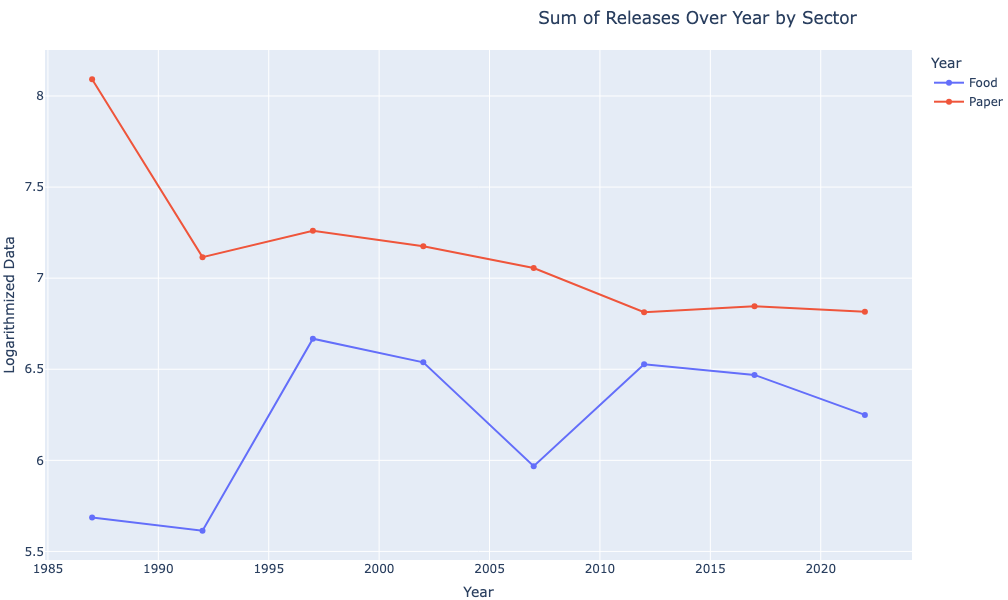

In [77]:
fig = px.line(sum_all_df, y="Logarithmized Data", x="Year", 
              color='Sector',
              title='Sum of Releases Over Year by Sector', markers=True)
fig.update_layout(margin=dict(t=50, b=0, l=0, r=50))
fig.update_layout(legend_title="Year", title_x=0.5)
fig.update_layout(autosize=False, width=900, height=600)
fig.update_layout(title_y=0.98, title_x=0.85)
fig.show()

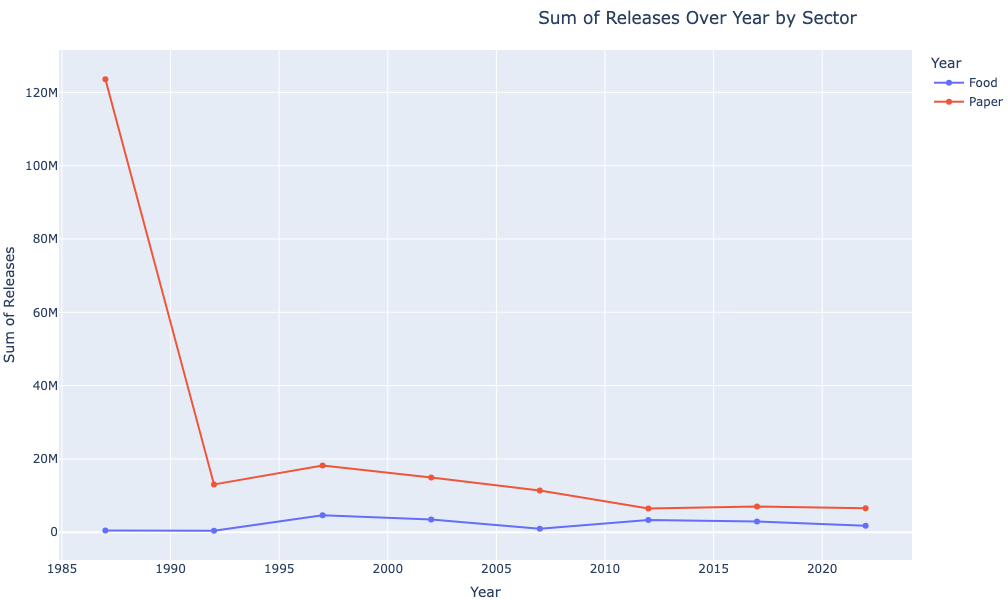

In [78]:
fig = px.line(sum_all_df, y="Sum of Releases", x="Year", 
              color='Sector',
              title='Sum of Releases Over Year by Sector', markers=True)
fig.update_layout(margin=dict(t=50, b=0, l=0, r=50))
fig.update_layout(legend_title="Year", title_x=0.5)
fig.update_layout(autosize=False, width=900, height=600)
fig.update_layout(title_y=0.98, title_x=0.85)
fig.show()

### Individual Line Graph for Other Sector (USE)

#### 1987

In [15]:
top10_releases87
other87 = top10_releases87.loc[top10_releases87['20. INDUSTRY SECTOR'] == 'Other']
other87

20. INDUSTRY SECTOR        Sum  Year
13               Other  4796247.0  1987

In [16]:
sum_other87 = other87['Sum'].to_numpy().sum()
sum_other87

4796247.0

In [21]:
sum_releases92 = df92.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
top10_releases92 = sum_releases92.sort_values("Sum", ascending=False)
top10_releases92['Year'] = '1992'
top10_releases92 = top10_releases92.loc[top10_releases92['20. INDUSTRY SECTOR'] == 'Other']
top10_releases92

20. INDUSTRY SECTOR       Sum  Year
12               Other  268155.0  1992

In [22]:
sum_releases97 = df97.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
top10_releases97 = sum_releases97.sort_values("Sum", ascending=False)
top10_releases97['Year'] = '1997'
top10_releases97 = top10_releases97.loc[top10_releases97['20. INDUSTRY SECTOR'] == 'Other']
top10_releases97

20. INDUSTRY SECTOR        Sum  Year
12               Other  1390787.0  1997

In [24]:
sum_releases02 = df02.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
top10_releases02 = sum_releases02.sort_values("Sum", ascending=False)
top10_releases02['Year'] = '2002'
top10_releases02 = top10_releases02.loc[top10_releases02['20. INDUSTRY SECTOR'] == 'Other']
top10_releases02

20. INDUSTRY SECTOR           Sum  Year
13               Other  1.373054e+07  2002

In [25]:
sum_releases07 = df07.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
top10_releases07 = sum_releases07.sort_values("Sum", ascending=False)
top10_releases07['Year'] = '2007'
top10_releases07 = top10_releases07.loc[top10_releases07['20. INDUSTRY SECTOR'] == 'Other']
top10_releases07

20. INDUSTRY SECTOR           Sum  Year
13               Other  1.452810e+07  2007

In [26]:
sum_releases12 = df12.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
top10_releases12 = sum_releases12.sort_values("Sum", ascending=False)
top10_releases12['Year'] = '2012'
top10_releases12 = top10_releases12.loc[top10_releases12['20. INDUSTRY SECTOR'] == 'Other']
top10_releases12

20. INDUSTRY SECTOR           Sum  Year
13               Other  8.553324e+06  2012

In [28]:
sum_releases17 = df17.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
top10_releases17 = sum_releases17.sort_values("Sum", ascending=False)
top10_releases17['Year'] = '2017'
top10_releases17 = top10_releases17.loc[top10_releases17['20. INDUSTRY SECTOR'] == 'Other']
top10_releases17

20. INDUSTRY SECTOR           Sum  Year
13               Other  1.015744e+07  2017

In [18]:
other22 = top10_releases22.loc[top10_releases22['20. INDUSTRY SECTOR'] == 'Other']
sum_other22 = other22['Sum'].to_numpy().sum()
sum_other22

8624468.437292

In [19]:
other22

20. INDUSTRY SECTOR           Sum  Year
13               Other  8.624468e+06  2022

In [30]:
frames = [other87, top10_releases92, top10_releases97, top10_releases02,
          top10_releases07, top10_releases12, top10_releases17, other22]
other_df = pd.concat(frames)
other_df

20. INDUSTRY SECTOR           Sum  Year
13               Other  4.796247e+06  1987
12               Other  2.681550e+05  1992
12               Other  1.390787e+06  1997
13               Other  1.373054e+07  2002
13               Other  1.452810e+07  2007
13               Other  8.553324e+06  2012
13               Other  1.015744e+07  2017
13               Other  8.624468e+06  2022

#### Petroleum Gathering

In [60]:
# pet87 = releases87.loc[releases87['20. INDUSTRY SECTOR'] == 'Petroleum']
# pet87['Year'] = '1987'
# pet87
sum_releases87 = df87.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
pet87 = sum_releases87.sort_values("Sum", ascending=False)
pet87['Year'] = '1987'
pet87 = pet87.loc[pet87['20. INDUSTRY SECTOR'] == 'Petroleum']
pet87

20. INDUSTRY SECTOR        Sum  Year
15           Petroleum  2171632.0  1987

In [84]:
sum_releases92 = df92.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
pet92 = sum_releases92.sort_values("Sum", ascending=False)
pet92['Year'] = '1992'
pet92 = pet92.loc[pet92['20. INDUSTRY SECTOR'] == 'Petroleum']
# pet92

sum_releases97 = df97.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
pet97 = sum_releases97.sort_values("Sum", ascending=False)
pet97['Year'] = '1997'
pet97 = pet97.loc[pet97['20. INDUSTRY SECTOR'] == 'Petroleum']
# pet97

sum_releases02 = df02.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
pet02 = sum_releases02.sort_values("Sum", ascending=False)
pet02['Year'] = '2002'
pet02 = pet02.loc[pet02['20. INDUSTRY SECTOR'] == 'Petroleum']
# pet02

sum_releases07 = df07.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
pet07 = sum_releases07.sort_values("Sum", ascending=False)
pet07['Year'] = '2007'
pet07 = pet07.loc[pet07['20. INDUSTRY SECTOR'] == 'Petroleum']
# pet07

sum_releases12 = df12.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
pet12 = sum_releases12.sort_values("Sum", ascending=False)
pet12['Year'] = '2012'
pet12 = pet12.loc[pet12['20. INDUSTRY SECTOR'] == 'Petroleum']
# pet12

sum_releases17 = df17.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
pet17 = sum_releases17.sort_values("Sum", ascending=False)
pet17['Year'] = '2017'
pet17 = pet17.loc[pet17['20. INDUSTRY SECTOR'] == 'Petroleum']
# pet17

sum_releases22 = df22.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
pet22 = sum_releases22.sort_values("Sum", ascending=False)
pet22['Year'] = '2022'
pet22 = pet22.loc[pet22['20. INDUSTRY SECTOR'] == 'Petroleum']
# pet22

In [72]:
pet_frames = [pet87, pet92, pet97, pet02, pet07, pet12, pet17, pet22]
pet_df = pd.concat(pet_frames)
pet_df

20. INDUSTRY SECTOR           Sum  Year
15           Petroleum  2.171632e+06  1987
14           Petroleum  4.975890e+05  1992
14           Petroleum  6.920930e+05  1997
15           Petroleum  2.963648e+05  2002
15           Petroleum  2.309861e+05  2007
15           Petroleum  2.963654e+01  2012
15           Petroleum  2.138982e+04  2017
15           Petroleum  1.318013e+06  2022

#### Printing Gathering

In [82]:
sum_releases87 = df87.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
print87 = sum_releases87.sort_values("Sum", ascending=False)
print87['Year'] = '1987'
print87 = print87.loc[print87['20. INDUSTRY SECTOR'] == 'Printing']
# print87

sum_releases92 = df92.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
print92 = sum_releases92.sort_values("Sum", ascending=False)
print92['Year'] = '1992'
print92 = print92.loc[print92['20. INDUSTRY SECTOR'] == 'Printing']
# pet92

sum_releases97 = df97.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
print97 = sum_releases97.sort_values("Sum", ascending=False)
print97['Year'] = '1997'
print97 = print97.loc[print97['20. INDUSTRY SECTOR'] == 'Printing']
# pet97

sum_releases02 = df02.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
print02 = sum_releases02.sort_values("Sum", ascending=False)
print02['Year'] = '2002'
print02 = print02.loc[print02['20. INDUSTRY SECTOR'] == 'Printing']
# pet02

sum_releases07 = df07.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
print07 = sum_releases07.sort_values("Sum", ascending=False)
print07['Year'] = '2007'
print07 = print07.loc[print07['20. INDUSTRY SECTOR'] == 'Printing']
# pet07

sum_releases12 = df12.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
print12 = sum_releases12.sort_values("Sum", ascending=False)
print12['Year'] = '2012'
print12 = print12.loc[print12['20. INDUSTRY SECTOR'] == 'Printing']
# pet12

sum_releases17 = df17.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
print17 = sum_releases17.sort_values("Sum", ascending=False)
print17['Year'] = '2017'
print17 = print17.loc[print17['20. INDUSTRY SECTOR'] == 'Printing']
# pet17

sum_releases22 = df22.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
print22 = sum_releases22.sort_values("Sum", ascending=False)
print22['Year'] = '2022'
print22 = print22.loc[print22['20. INDUSTRY SECTOR'] == 'Printing']
# pet22

In [83]:
print_frames = [print87, print92, print97, print02, print07, print12, print17, print22]
print_df = pd.concat(print_frames)
print_df

20. INDUSTRY SECTOR           Sum  Year
19            Printing  7.627668e+06  1987
17            Printing  4.781883e+06  1992
17            Printing  2.719629e+06  1997
19            Printing  3.188420e+06  2002
19            Printing  1.195980e+06  2007
19            Printing  4.680078e+05  2012
19            Printing  9.353110e+04  2017
19            Printing  2.151657e+04  2022

### Chemical gathering

In [33]:
# Change to chemicals
sum_releases87 = df87.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
chem87 = sum_releases87.sort_values("Sum", ascending=False)
chem87['Year'] = '1987'
chem87 = chem87.loc[chem87['20. INDUSTRY SECTOR'] == 'Chemicals']
# print87

sum_releases92 = df92.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
chem92 = sum_releases92.sort_values("Sum", ascending=False)
chem92['Year'] = '1992'
chem92 = chem92.loc[chem92['20. INDUSTRY SECTOR'] == 'Chemicals']
# pet92

sum_releases97 = df97.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
chem97 = sum_releases97.sort_values("Sum", ascending=False)
chem97['Year'] = '1997'
chem97 = chem97.loc[chem97['20. INDUSTRY SECTOR'] == 'Chemicals']
# pet97

sum_releases02 = df02.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
chem02 = sum_releases02.sort_values("Sum", ascending=False)
chem02['Year'] = '2002'
chem02 = chem02.loc[chem02['20. INDUSTRY SECTOR'] == 'Chemicals']
# pet02

sum_releases07 = df07.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
chem07 = sum_releases07.sort_values("Sum", ascending=False)
chem07['Year'] = '2007'
chem07 = chem07.loc[chem07['20. INDUSTRY SECTOR'] == 'Chemicals']
# pet07

sum_releases12 = df12.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
chem12 = sum_releases12.sort_values("Sum", ascending=False)
chem12['Year'] = '2012'
chem12 = chem12.loc[chem12['20. INDUSTRY SECTOR'] == 'Chemicals']
# pet12

sum_releases17 = df17.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
chem17 = sum_releases17.sort_values("Sum", ascending=False)
chem17['Year'] = '2017'
chem17 = chem17.loc[chem17['20. INDUSTRY SECTOR'] == 'Chemicals']
# pet17

sum_releases22 = df22.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
chem22 = sum_releases22.sort_values("Sum", ascending=False)
chem22['Year'] = '2022'
chem22 = chem22.loc[chem22['20. INDUSTRY SECTOR'] == 'Chemicals']
chem22

20. INDUSTRY SECTOR           Sum  Year
2           Chemicals  4.783454e+06  2022

In [34]:
chem_frames = [chem87, chem92, chem97, chem02, chem07, chem12, chem17, chem22]
chem_df = pd.concat(chem_frames)
chem_df

20. INDUSTRY SECTOR           Sum  Year
3           Chemicals  2.090067e+08  1987
3           Chemicals  2.246028e+07  1992
3           Chemicals  1.008758e+07  1997
2           Chemicals  9.660913e+06  2002
2           Chemicals  4.780860e+06  2007
2           Chemicals  4.363623e+06  2012
2           Chemicals  4.237659e+06  2017
2           Chemicals  4.783454e+06  2022

### Paper gathering

In [35]:
# Change to paper
sum_releases87 = df87.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
paper87 = sum_releases87.sort_values("Sum", ascending=False)
paper87['Year'] = '1987'
paper87 = paper87.loc[paper87['20. INDUSTRY SECTOR'] == 'Paper']
# print87

sum_releases92 = df92.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
paper92 = sum_releases92.sort_values("Sum", ascending=False)
paper92['Year'] = '1992'
paper92 = paper92.loc[paper92['20. INDUSTRY SECTOR'] == 'Paper']
# pet92

sum_releases97 = df97.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
paper97 = sum_releases97.sort_values("Sum", ascending=False)
paper97['Year'] = '1997'
paper97 = paper97.loc[paper97['20. INDUSTRY SECTOR'] == 'Paper']
# pet97

sum_releases02 = df02.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
paper02 = sum_releases02.sort_values("Sum", ascending=False)
paper02['Year'] = '2002'
paper02 = paper02.loc[paper02['20. INDUSTRY SECTOR'] == 'Paper']
# pet02

sum_releases07 = df07.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
paper07 = sum_releases07.sort_values("Sum", ascending=False)
paper07['Year'] = '2007'
paper07 = paper07.loc[paper07['20. INDUSTRY SECTOR'] == 'Paper']
# pet07

sum_releases12 = df12.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
paper12 = sum_releases12.sort_values("Sum", ascending=False)
paper12['Year'] = '2012'
paper12 = paper12.loc[paper12['20. INDUSTRY SECTOR'] == 'Paper']
# pet12

sum_releases17 = df17.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
paper17 = sum_releases17.sort_values("Sum", ascending=False)
paper17['Year'] = '2017'
paper17 = paper17.loc[paper17['20. INDUSTRY SECTOR'] == 'Paper']
# pet17

sum_releases22 = df22.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
paper22 = sum_releases22.sort_values("Sum", ascending=False)
paper22['Year'] = '2022'
paper22 = paper22.loc[paper22['20. INDUSTRY SECTOR'] == 'Paper']
# pet22

In [36]:
paper_frames = [paper87, paper92, paper97, paper02, paper07, paper12, paper17, paper22]
paper_df = pd.concat(paper_frames)
paper_df

20. INDUSTRY SECTOR           Sum  Year
14               Paper  1.235728e+08  1987
13               Paper  1.304694e+07  1992
13               Paper  1.820348e+07  1997
14               Paper  1.496354e+07  2002
14               Paper  1.136443e+07  2007
14               Paper  6.497866e+06  2012
14               Paper  7.014685e+06  2017
14               Paper  6.534435e+06  2022

### Combining the dataframes for line graphs

In [37]:
combined_frames = [chem_df, paper_df]
combined_df = pd.concat(combined_frames)
combined_df

20. INDUSTRY SECTOR           Sum  Year
3            Chemicals  2.090067e+08  1987
3            Chemicals  2.246028e+07  1992
3            Chemicals  1.008758e+07  1997
2            Chemicals  9.660913e+06  2002
2            Chemicals  4.780860e+06  2007
2            Chemicals  4.363623e+06  2012
2            Chemicals  4.237659e+06  2017
2            Chemicals  4.783454e+06  2022
14               Paper  1.235728e+08  1987
13               Paper  1.304694e+07  1992
13               Paper  1.820348e+07  1997
14               Paper  1.496354e+07  2002
14               Paper  1.136443e+07  2007
14               Paper  6.497866e+06  2012
14               Paper  7.014685e+06  2017
14               Paper  6.534435e+06  2022

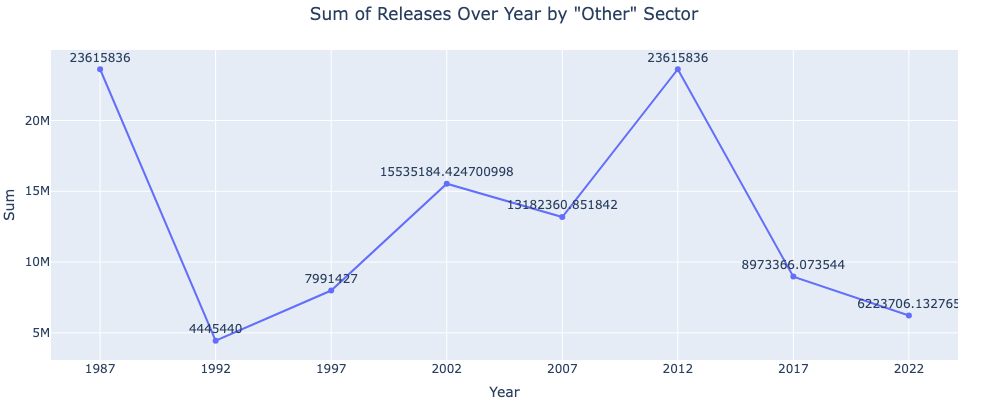

In [38]:
fig = px.line(other_df, y="Sum", x="Year", 
              title='Sum of Releases Over Year by "Other" Sector', markers=True, text="Sum")
fig.update_layout(margin=dict(t=50, b=0, l=0, r=50))
fig.update_layout(legend_title="Year", title_x=0.3)
fig.update_layout(autosize=False, width=900, height=400)
fig.update_layout(title_y=0.98, title_x=0.5)
fig.update_traces(textposition='top center')
fig.show()
#log_x=True

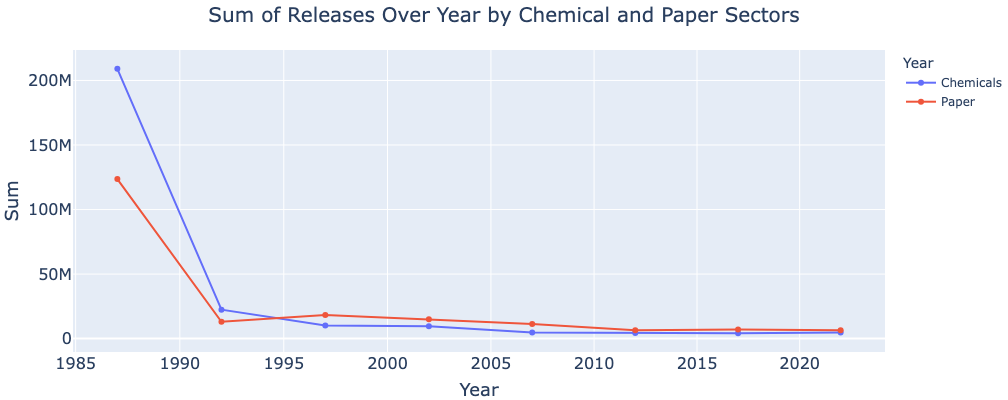

In [92]:
fig = px.line(combined_df, y="Sum", x="Year", 
              title='Sum of Releases Over Year by Chemical and Paper Sectors', color = '20. INDUSTRY SECTOR', log_x = True, markers=True)
fig.update_layout(margin=dict(t=50, b=0, l=0, r=50))
fig.update_layout(legend_title="Year", title_x=0.3)
fig.update_layout(autosize=False, width=900, height=400)
fig.update_layout(title_y=0.98, title_x=0.5)
fig.update_traces(textposition='top center')
fig.update_layout(
    title_font=dict(size=20),
    xaxis_title_font=dict(size=18),
    yaxis_title_font=dict(size=18),
    yaxis = dict(tickfont = dict(size=16)),
    xaxis = dict(tickfont = dict(size=16))
)
fig.show()
#log_x=True
#text = "Sum"

In [40]:
# Look into regulations that were passed
# Graph all changes and see where there are drastic changes
# Examine businesses?
# Look at paper and chemical sectors

In [41]:
# Writeup: Format like a scientific journal
# Intro, motivation, section to show figures, deeper dive into certain categories, references

### Air gathering

In [11]:
# sec_releases87 = df87.groupby('20. INDUSTRY SECTOR')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
# air87 = sec_releases87.sort_values("Sum", ascending=False)
# air87['Year'] = '1987'
# air87 = air87.loc[air87['20. INDUSTRY SECTOR'] == 'Paper']
# print out air sector, sum of air sector numbers, year

# air_releases87 = df87.groupby('Combined Air')['104. TOTAL RELEASES'].sum().reset_index(name='Sum')
air_releases87 = df87['Combined Air']
sum_air87 = air_releases87.sum()
sum_air87_df = pd.DataFrame([[sum_air87]],columns=['Sum'])
sum_air87_df['Year'] = '1987'
sum_air87_df['Sector'] = 'Air'
sum_air87_df

Sum  Year Sector
0  145172673.0  1987    Air

In [12]:
air_releases92 = df92['Combined Air']
sum_air92 = air_releases92.sum()
sum_air92_df = pd.DataFrame([[sum_air92]],columns=['Sum'])
sum_air92_df['Year'] = '1992'
sum_air92_df['Sector'] = 'Air'
# sum_air92_df

air_releases97 = df97['Combined Air']
sum_air97 = air_releases97.sum()
sum_air97_df = pd.DataFrame([[sum_air97]],columns=['Sum'])
sum_air97_df['Year'] = '1997'
sum_air97_df['Sector'] = 'Air'
# sum_air97_df

air_releases02 = df02['Combined Air']
sum_air02 = air_releases02.sum()
sum_air02_df = pd.DataFrame([[sum_air02]],columns=['Sum'])
sum_air02_df['Year'] = '2002'
sum_air02_df['Sector'] = 'Air'
# sum_air02_df

air_releases07 = df07['Combined Air']
sum_air07 = air_releases07.sum()
sum_air07_df = pd.DataFrame([[sum_air07]],columns=['Sum'])
sum_air07_df['Year'] = '2007'
sum_air07_df['Sector'] = 'Air'
# sum_air02_df

air_releases12 = df12['Combined Air']
sum_air12 = air_releases12.sum()
sum_air12_df = pd.DataFrame([[sum_air12]],columns=['Sum'])
sum_air12_df['Year'] = '2012'
sum_air12_df['Sector'] = 'Air'
# sum_air12_df

air_releases17 = df17['Combined Air']
sum_air17 = air_releases17.sum()
sum_air17_df = pd.DataFrame([[sum_air17]],columns=['Sum'])
sum_air17_df['Year'] = '2017'
sum_air17_df['Sector'] = 'Air'
# sum_air17_df

air_releases22 = df22['Combined Air']
sum_air22 = air_releases22.sum()
sum_air22_df = pd.DataFrame([[sum_air22]],columns=['Sum'])
sum_air22_df['Year'] = '2022'
sum_air22_df['Sector'] = 'Air'
# sum_air22_df

In [13]:
air_frames = [sum_air87_df, sum_air92_df, sum_air97_df, sum_air02_df, 
              sum_air07_df, sum_air12_df, sum_air17_df, sum_air22_df]
air_df = pd.concat(air_frames)
air_df

Sum  Year Sector
0  1.451727e+08  1987    Air
0  6.582979e+07  1992    Air
0  4.854111e+07  1997    Air
0  5.696188e+07  2002    Air
0  3.950086e+07  2007    Air
0  2.085558e+07  2012    Air
0  1.641368e+07  2017    Air
0  1.401291e+07  2022    Air

### Gathering non-air

In [14]:
nonair_releases87 = df87['Non-Air']
sum_nonair87 = nonair_releases87.sum()
sum_nonair87_df = pd.DataFrame([[sum_nonair87]],columns=['Sum'])
sum_nonair87_df['Year'] = '1987'
sum_nonair87_df['Sector'] = 'Non-Air'

nonair_releases92 = df92['Non-Air']
sum_nonair92 = nonair_releases92.sum()
sum_nonair92_df = pd.DataFrame([[sum_nonair92]],columns=['Sum'])
sum_nonair92_df['Year'] = '1992'
sum_nonair92_df['Sector'] = 'Non-Air'
# sum_air92_df

nonair_releases97 = df97['Non-Air']
sum_nonair97 = nonair_releases97.sum()
sum_nonair97_df = pd.DataFrame([[sum_air97]],columns=['Sum'])
sum_nonair97_df['Year'] = '1997'
sum_nonair97_df['Sector'] = 'Non-Air'
# sum_air97_df

nonair_releases02 = df02['Non-Air']
sum_nonair02 = nonair_releases02.sum()
sum_nonair02_df = pd.DataFrame([[sum_nonair02]],columns=['Sum'])
sum_nonair02_df['Year'] = '2002'
sum_nonair02_df['Sector'] = 'Non-Air'
# sum_air02_df

nonair_releases07 = df07['Non-Air']
sum_nonair07 = nonair_releases07.sum()
sum_nonair07_df = pd.DataFrame([[sum_nonair07]],columns=['Sum'])
sum_nonair07_df['Year'] = '2007'
sum_nonair07_df['Sector'] = 'Non-Air'
# sum_air02_df

nonair_releases12 = df12['Non-Air']
sum_nonair12 = nonair_releases12.sum()
sum_nonair12_df = pd.DataFrame([[sum_nonair12]],columns=['Sum'])
sum_nonair12_df['Year'] = '2012'
sum_nonair12_df['Sector'] = 'Non-Air'
# sum_air12_df

nonair_releases17 = df17['Non-Air']
sum_nonair17 = nonair_releases17.sum()
sum_nonair17_df = pd.DataFrame([[sum_nonair17]],columns=['Sum'])
sum_nonair17_df['Year'] = '2017'
sum_nonair17_df['Sector'] = 'Non-Air'
# sum_air17_df

nonair_releases22 = df22['Non-Air']
sum_nonair22 = nonair_releases22.sum()
sum_nonair22_df = pd.DataFrame([[sum_nonair22]],columns=['Sum'])
sum_nonair22_df['Year'] = '2022'
sum_nonair22_df['Sector'] = 'Non-Air'
# sum_nonair22_df

In [15]:
nonair_frames = [sum_nonair87_df, sum_nonair92_df, sum_nonair97_df, sum_nonair02_df, 
              sum_nonair07_df, sum_nonair12_df, sum_nonair17_df, sum_nonair22_df]
nonair_df = pd.concat(nonair_frames)
nonair_df

Sum  Year   Sector
0  2.492143e+08  1987  Non-Air
0  6.347974e+06  1992  Non-Air
0  4.854111e+07  1997  Non-Air
0  3.355421e+07  2002  Non-Air
0  3.256734e+07  2007  Non-Air
0  2.199582e+07  2012  Non-Air
0  2.027180e+07  2017  Non-Air
0  1.635928e+07  2022  Non-Air

### Combining air and non-air dataframes

In [16]:
combined_air_frames = [air_df, nonair_df]
combined_air_df = pd.concat(combined_air_frames)
combined_air_df

Sum  Year   Sector
0  1.451727e+08  1987      Air
0  6.582979e+07  1992      Air
0  4.854111e+07  1997      Air
0  5.696188e+07  2002      Air
0  3.950086e+07  2007      Air
0  2.085558e+07  2012      Air
0  1.641368e+07  2017      Air
0  1.401291e+07  2022      Air
0  2.492143e+08  1987  Non-Air
0  6.347974e+06  1992  Non-Air
0  4.854111e+07  1997  Non-Air
0  3.355421e+07  2002  Non-Air
0  3.256734e+07  2007  Non-Air
0  2.199582e+07  2012  Non-Air
0  2.027180e+07  2017  Non-Air
0  1.635928e+07  2022  Non-Air

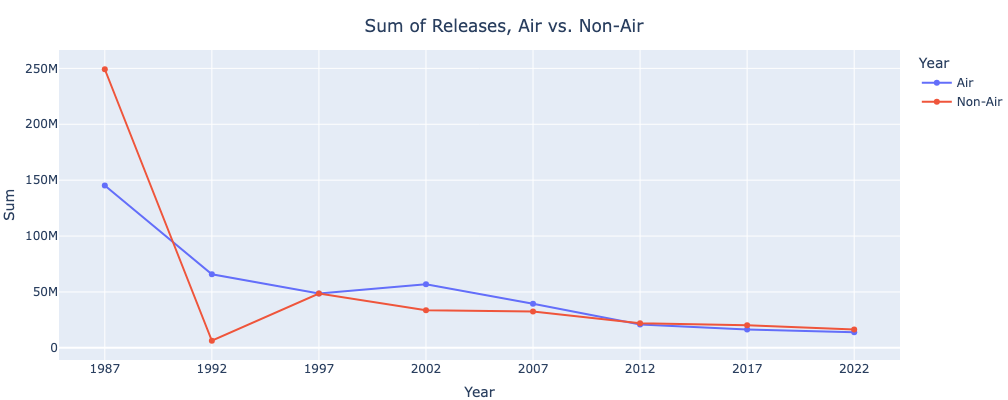

In [17]:
fig = px.line(combined_air_df, y="Sum", x="Year", 
              title='Sum of Releases, Air vs. Non-Air', color = 'Sector', markers=True)
fig.update_layout(margin=dict(t=50, b=0, l=0, r=50))
fig.update_layout(legend_title="Year", title_x=0.3)
fig.update_layout(autosize=False, width=900, height=400)
fig.update_layout(title_y=0.95, title_x=0.5)
fig.update_traces(textposition='top center')
fig.show()

### Gathering water

In [18]:
water_releases87 = df87['Water']
sum_water87 = water_releases87.sum()
sum_water87_df = pd.DataFrame([[sum_water87]],columns=['Sum'])
sum_water87_df['Year'] = '1987'
sum_water87_df['Sector'] = 'Water'

water_releases92 = df92['Water']
sum_water92 = water_releases92.sum()
sum_water92_df = pd.DataFrame([[sum_water92]],columns=['Sum'])
sum_water92_df['Year'] = '1992'
sum_water92_df['Sector'] = 'Water'
# sum_air92_df

water_releases97 = df97['Water']
sum_water97 = water_releases97.sum()
sum_water97_df = pd.DataFrame([[sum_water97]],columns=['Sum'])
sum_water97_df['Year'] = '1997'
sum_water97_df['Sector'] = 'Water'
# sum_air97_df

water_releases02 = df02['Water']
sum_water02 = water_releases02.sum()
sum_water02_df = pd.DataFrame([[sum_water02]],columns=['Sum'])
sum_water02_df['Year'] = '2002'
sum_water02_df['Sector'] = 'Water'
# sum_air02_df

water_releases07 = df07['Water']
sum_water07 = water_releases07.sum()
sum_water07_df = pd.DataFrame([[sum_water07]],columns=['Sum'])
sum_water07_df['Year'] = '2007'
sum_water07_df['Sector'] = 'Water'
# sum_air02_df

water_releases12 = df12['Water']
sum_water12 = water_releases12.sum()
sum_water12_df = pd.DataFrame([[sum_water12]],columns=['Sum'])
sum_water12_df['Year'] = '2012'
sum_water12_df['Sector'] = 'Water'
# sum_air12_df

water_releases17 = df17['Water']
sum_water17 = water_releases17.sum()
sum_water17_df = pd.DataFrame([[sum_water17]],columns=['Sum'])
sum_water17_df['Year'] = '2017'
sum_water17_df['Sector'] = 'Water'
# sum_air17_df

water_releases22 = df22['Water']
sum_water22 = water_releases22.sum()
sum_water22_df = pd.DataFrame([[sum_water22]],columns=['Sum'])
sum_water22_df['Year'] = '2022'
sum_water22_df['Sector'] = 'Water'
# sum_water22_df

In [19]:
water_frames = [sum_water87_df, sum_water92_df, sum_water97_df, sum_water02_df, 
              sum_water07_df, sum_water12_df, sum_water17_df, sum_water22_df]
water_df = pd.concat(water_frames)
water_df

Sum  Year Sector
0  2.255985e+08  1987  Water
0  1.902534e+06  1992  Water
0  6.958372e+06  1997  Water
0  1.801902e+07  2002  Water
0  1.938498e+07  2007  Water
0  1.188364e+07  2012  Water
0  1.129843e+07  2017  Water
0  1.013558e+07  2022  Water

### Gathering non-water

In [20]:
nonwater_releases87 = df87['Non-Water']
sum_nonwater87 = nonwater_releases87.sum()
sum_nonwater87_df = pd.DataFrame([[sum_nonwater87]],columns=['Sum'])
sum_nonwater87_df['Year'] = '1987'
sum_nonwater87_df['Sector'] = 'Non-Water'

nonwater_releases92 = df92['Non-Water']
sum_nonwater92 = nonwater_releases92.sum()
sum_nonwater92_df = pd.DataFrame([[sum_nonwater92]],columns=['Sum'])
sum_nonwater92_df['Year'] = '1992'
sum_nonwater92_df['Sector'] = 'Non-Water'
# sum_air92_df

nonwater_releases97 = df97['Non-Water']
sum_nonwater97 = nonwater_releases97.sum()
sum_nonwater97_df = pd.DataFrame([[sum_nonwater97]],columns=['Sum'])
sum_nonwater97_df['Year'] = '1997'
sum_nonwater97_df['Sector'] = 'Non-Water'
# sum_air97_df

nonwater_releases02 = df02['Non-Water']
sum_nonwater02 = nonwater_releases02.sum()
sum_nonwater02_df = pd.DataFrame([[sum_nonwater02]],columns=['Sum'])
sum_nonwater02_df['Year'] = '2002'
sum_nonwater02_df['Sector'] = 'Non-Water'
# sum_air02_df

nonwater_releases07 = df07['Non-Water']
sum_nonwater07 = nonwater_releases07.sum()
sum_nonwater07_df = pd.DataFrame([[sum_nonwater07]],columns=['Sum'])
sum_nonwater07_df['Year'] = '2007'
sum_nonwater07_df['Sector'] = 'Non-Water'
# sum_air02_df

nonwater_releases12 = df12['Non-Water']
sum_nonwater12 = nonwater_releases12.sum()
sum_nonwater12_df = pd.DataFrame([[sum_nonwater12]],columns=['Sum'])
sum_nonwater12_df['Year'] = '2012'
sum_nonwater12_df['Sector'] = 'Non-Water'
# sum_air12_df

nonwater_releases17 = df17['Non-Water']
sum_nonwater17 = nonwater_releases17.sum()
sum_nonwater17_df = pd.DataFrame([[sum_nonwater17]],columns=['Sum'])
sum_nonwater17_df['Year'] = '2017'
sum_nonwater17_df['Sector'] = 'Non-Water'
# sum_air17_df

nonwater_releases22 = df22['Non-Water']
sum_nonwater22 = nonwater_releases22.sum()
sum_nonwater22_df = pd.DataFrame([[sum_nonwater22]],columns=['Sum'])
sum_nonwater22_df['Year'] = '2022'
sum_nonwater22_df['Sector'] = 'Non-Water'
# sum_nonwater22_df

In [21]:
nonwater_frames = [sum_nonwater87_df, sum_nonwater92_df, sum_nonwater97_df, sum_nonwater02_df, 
              sum_nonwater07_df, sum_nonwater12_df, sum_nonwater17_df, sum_nonwater22_df]
nonwater_df = pd.concat(nonwater_frames)
nonwater_df

Sum  Year     Sector
0  1.687885e+08  1987  Non-Water
0  7.027523e+07  1992  Non-Water
0  5.653254e+07  1997  Non-Water
0  7.249707e+07  2002  Non-Water
0  5.268322e+07  2007  Non-Water
0  3.096776e+07  2012  Non-Water
0  2.538705e+07  2017  Non-Water
0  2.023661e+07  2022  Non-Water

In [22]:
combined_water_frames = [water_df, nonwater_df]
combined_water_df = pd.concat(combined_water_frames)
combined_water_df

Sum  Year     Sector
0  2.255985e+08  1987      Water
0  1.902534e+06  1992      Water
0  6.958372e+06  1997      Water
0  1.801902e+07  2002      Water
0  1.938498e+07  2007      Water
0  1.188364e+07  2012      Water
0  1.129843e+07  2017      Water
0  1.013558e+07  2022      Water
0  1.687885e+08  1987  Non-Water
0  7.027523e+07  1992  Non-Water
0  5.653254e+07  1997  Non-Water
0  7.249707e+07  2002  Non-Water
0  5.268322e+07  2007  Non-Water
0  3.096776e+07  2012  Non-Water
0  2.538705e+07  2017  Non-Water
0  2.023661e+07  2022  Non-Water

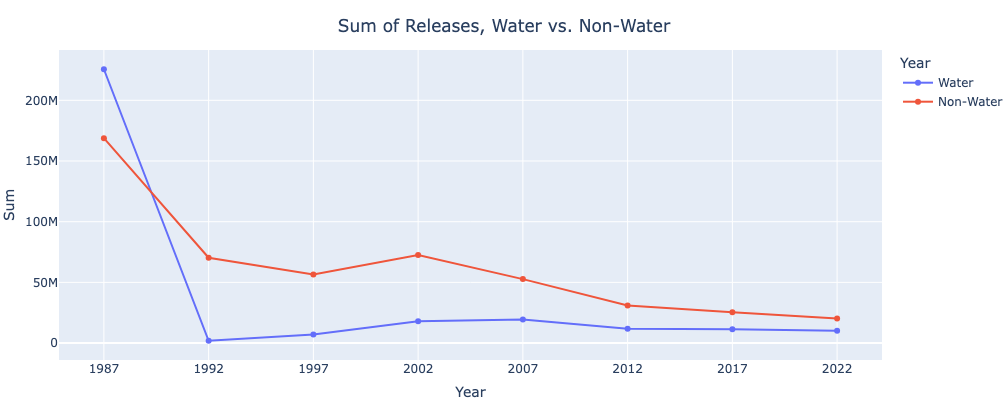

In [23]:
fig = px.line(combined_water_df, y="Sum", x="Year", 
              title='Sum of Releases, Water vs. Non-Water', color = 'Sector', markers=True)
fig.update_layout(margin=dict(t=50, b=0, l=0, r=50))
fig.update_layout(legend_title="Year", title_x=0.3)
fig.update_layout(autosize=False, width=900, height=400)
fig.update_layout(title_y=0.95, title_x=0.5)
fig.update_traces(textposition='top center')
fig.show()

### Gathering other

In [29]:
other_releases87 = df87['Other']
sum_other87 = other_releases87.sum()
sum_other87_df = pd.DataFrame([[sum_other87]],columns=['Sum'])
sum_other87_df['Year'] = '1987'
sum_other87_df['Sector'] = 'Other Releases'

other_releases92 = df92['Other']
sum_other92 = other_releases92.sum()
sum_other92_df = pd.DataFrame([[sum_other92]],columns=['Sum'])
sum_other92_df['Year'] = '1992'
sum_other92_df['Sector'] = 'Other Releases'

other_releases97 = df97['Other']
sum_other97 = other_releases97.sum()
sum_other97_df = pd.DataFrame([[sum_other97]],columns=['Sum'])
sum_other97_df['Year'] = '1997'
sum_other97_df['Sector'] = 'Other Releases'

other_releases02 = df02['Other']
sum_other02 = other_releases02.sum()
sum_other02_df = pd.DataFrame([[sum_other02]],columns=['Sum'])
sum_other02_df['Year'] = '2002'
sum_other02_df['Sector'] = 'Other Releases'

other_releases07 = df07['Other']
sum_other07 = other_releases07.sum()
sum_other07_df = pd.DataFrame([[sum_other07]],columns=['Sum'])
sum_other07_df['Year'] = '2007'
sum_other07_df['Sector'] = 'Other Releases'

other_releases12 = df87['Other']
sum_other12 = other_releases12.sum()
sum_other12_df = pd.DataFrame([[sum_other12]],columns=['Sum'])
sum_other12_df['Year'] = '2012'
sum_other12_df['Sector'] = 'Other Releases'

other_releases17 = df17['Other']
sum_other17 = other_releases17.sum()
sum_other17_df = pd.DataFrame([[sum_other17]],columns=['Sum'])
sum_other17_df['Year'] = '2017'
sum_other17_df['Sector'] = 'Other Releases'

other_releases22 = df22['Other']
sum_other22 = other_releases22.sum()
sum_other22_df = pd.DataFrame([[sum_other22]],columns=['Sum'])
sum_other22_df['Year'] = '2022'
sum_other22_df['Sector'] = 'Other Releases'

In [30]:
other_frames = [sum_other87_df, sum_other92_df, sum_other97_df, sum_other02_df, 
              sum_other07_df, sum_other12_df, sum_other17_df, sum_other22_df]
other_df = pd.concat(other_frames)
other_df

Sum  Year          Sector
0  2.361584e+07  1987  Other Releases
0  4.445440e+06  1992  Other Releases
0  7.991427e+06  1997  Other Releases
0  1.553518e+07  2002  Other Releases
0  1.318236e+07  2007  Other Releases
0  2.361584e+07  2012  Other Releases
0  8.973366e+06  2017  Other Releases
0  6.223706e+06  2022  Other Releases

In [61]:
comp_frames = [air_df, water_df, other_df]
comp_df = pd.concat(comp_frames)
comp_df

Sum  Year          Sector
0  1.451727e+08  1987             Air
0  6.582979e+07  1992             Air
0  4.854111e+07  1997             Air
0  5.696188e+07  2002             Air
0  3.950086e+07  2007             Air
0  2.085558e+07  2012             Air
0  1.641368e+07  2017             Air
0  1.401291e+07  2022             Air
0  2.255985e+08  1987           Water
0  1.902534e+06  1992           Water
0  6.958372e+06  1997           Water
0  1.801902e+07  2002           Water
0  1.938498e+07  2007           Water
0  1.188364e+07  2012           Water
0  1.129843e+07  2017           Water
0  1.013558e+07  2022           Water
0  2.361584e+07  1987  Other Releases
0  4.445440e+06  1992  Other Releases
0  7.991427e+06  1997  Other Releases
0  1.553518e+07  2002  Other Releases
0  1.318236e+07  2007  Other Releases
0  2.361584e+07  2012  Other Releases
0  8.973366e+06  2017  Other Releases
0  6.223706e+06  2022  Other Releases

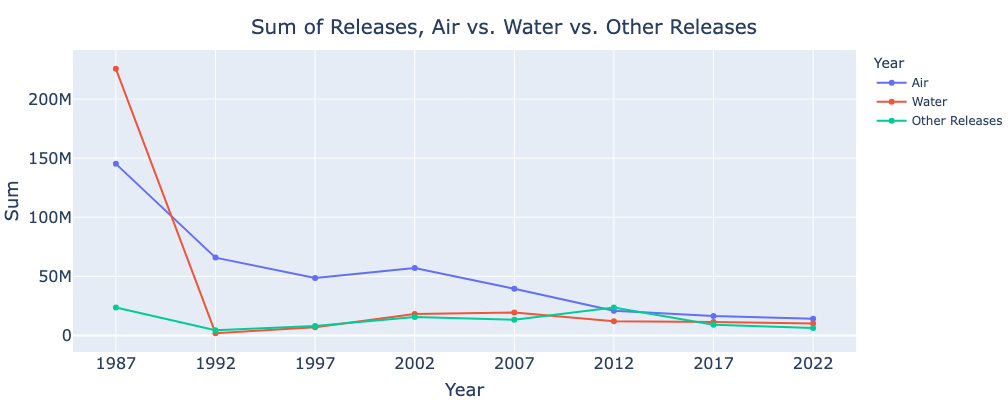

In [93]:
fig = px.line(comp_df, y="Sum", x="Year", 
              title='Sum of Releases, Air vs. Water vs. Other Releases', color = 'Sector', markers=True)
fig.update_layout(margin=dict(t=50, b=0, l=0, r=50))
fig.update_layout(legend_title="Year", title_x=0.3)
fig.update_layout(autosize=False, width=900, height=400)
fig.update_layout(title_y=0.95, title_x=0.5)
fig.update_layout(width=1000)
fig.update_layout(
    title_font=dict(size=20),
    xaxis_title_font=dict(size=18),
    yaxis_title_font=dict(size=18),
    yaxis = dict(tickfont = dict(size=16)),
    xaxis = dict(tickfont = dict(size=16))
)
fig.show()